<img src="https://academy.divar.ir/real-estate/wp-content/uploads/2021/04/market-analysis-97-99.jpg" width=80% />

# House Price Prediction in Action (Regression)

## Importing the libraries

In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pycaret
from pycaret.regression import *
from autoviz.AutoViz_Class import AutoViz_Class
import shap
import wandb
import streamlit as st

import joblib

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [60]:
#Read the dataset and print the top 5 elements of the dataset
df = pd.read_csv('tehranhouses.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333


In [61]:
model_columns = joblib.load("model_features.pkl")  # شامل همه ستون‌های آموزش مدل

In [62]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price           int64
Price(USD)    float64
dtype: object

In [63]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
270,170,3,True,True,True,Gheitarieh,15400000000,513333
3370,112,2,True,True,True,Mahmoudieh,8400000000,280000
2172,44,1,False,True,False,Qasr-od-Dasht,770000000,25667
436,164,3,True,True,True,East Ferdows Boulevard,9840000000,328000
1202,140,3,True,True,True,Shahrake Gharb,9200000000,306667


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


In [65]:
df.describe()

,Room,Price,Price(USD)
count,3479,3479,3479
mean,2,5359022711,178634
std,1,8099934524,269998
min,0,3600000,120
25%,2,1418250000,47275
50%,2,2900000000,96667
75%,2,6000000000,200000
max,5,92400000000,3080000


In [66]:
type(df)

pandas.core.frame.DataFrame

PreProcessing

In [67]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [68]:
df = df.dropna(subset=['Address'])

In [69]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price           int64
Price(USD)    float64
dtype: object

In [70]:

df['Area'] = df['Area'].apply(lambda x: int(str(x).replace(',', '')))

In [71]:
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

In [72]:
df.dtypes

Area            int64
Room            int64
Parking         int64
Warehouse       int64
Elevator        int64
Address        object
Price           int64
Price(USD)    float64
dtype: object

# Explore the data (EDA)

In [73]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [74]:
df=df.drop('Price(USD)', axis=1)

In [75]:
exp=setup(df, target='Price', session_id=32, use_gpu=False, remove_outliers=True)


,Description,Value
0,Session id,32
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3456, 7)"
4,Transformed data shape,"(3335, 7)"
5,Transformed train set shape,"(2298, 7)"
6,Transformed test set shape,"(1037, 7)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [76]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPursuit,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [77]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1441727176.6982,17447996643736872960.0000,4036396416.3465,0.7270,0.4484,0.8595,0.4210
rf,Random Forest Regressor,1468069205.1362,18143328875703914496.0000,4093281316.2229,0.7220,0.4529,0.9156,0.4650
lightgbm,Light Gradient Boosting Machine,1483067715.6455,18846085303011057664.0000,4176619235.2993,0.7137,0.4553,0.9472,0.3660
gbr,Gradient Boosting Regressor,1517113131.4083,20093713408892837888.0000,4261556683.0759,0.6976,0.4793,0.8735,0.2650
xgboost,Extreme Gradient Boosting,1484522201.3667,23555168680097619968.0000,4609259626.2097,0.6420,0.4448,0.8565,0.3040
knn,K Neighbors Regressor,1629221181.1031,25023870828253114368.0000,4809026149.0498,0.6279,0.4836,0.6438,0.2040
dt,Decision Tree Regressor,1688338640.2064,26220166562423320576.0000,4864492999.4619,0.6059,0.5460,0.6127,0.1980
ada,AdaBoost Regressor,3032549771.8736,26400468425716604928.0000,5029886274.1809,0.5813,1.0180,2.4677,0.2370
br,Bayesian Ridge,2928725324.1440,42013264967879868416.0000,6323078091.5358,0.3593,0.7979,1.6055,0.1770
omp,Orthogonal Matching Pursuit,2929110715.2143,42012507561591848960.0000,6323052472.0064,0.3593,0.7977,1.6059,0.1810


ExtraTreesRegressor(n_jobs=-1, random_state=32)

Shape of your Data Set loaded: (3456, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 208 dup

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Area,int64,0.000000,7,30.000000,16160000000.000000,Column has 192 outliers greater than upper bound (200.00) or lower than lower bound(-8.00). Cap them or remove them.
Room,int64,0.000000,0,0.000000,5.000000,Column has 1429 outliers greater than upper bound (2.00) or lower than lower bound(2.00). Cap them or remove them.
Parking,int64,0.000000,0,0.000000,1.000000,No issue
Warehouse,int64,0.000000,0,0.000000,1.000000,No issue
Elevator,int64,0.000000,0,0.000000,1.000000,No issue
Address,object,0.000000,5,,,Possible high cardinality column with 192 unique values: Use hash encoding or text embedding to reduce dimension.
Price,int64,0.000000,28,3600000.000000,92400000000.000000,Column has 272 outliers greater than upper bound (13370000000.00) or lower than lower bound(-5750000000.00). Cap them or remove them.


Number of All Scatter Plots = 6


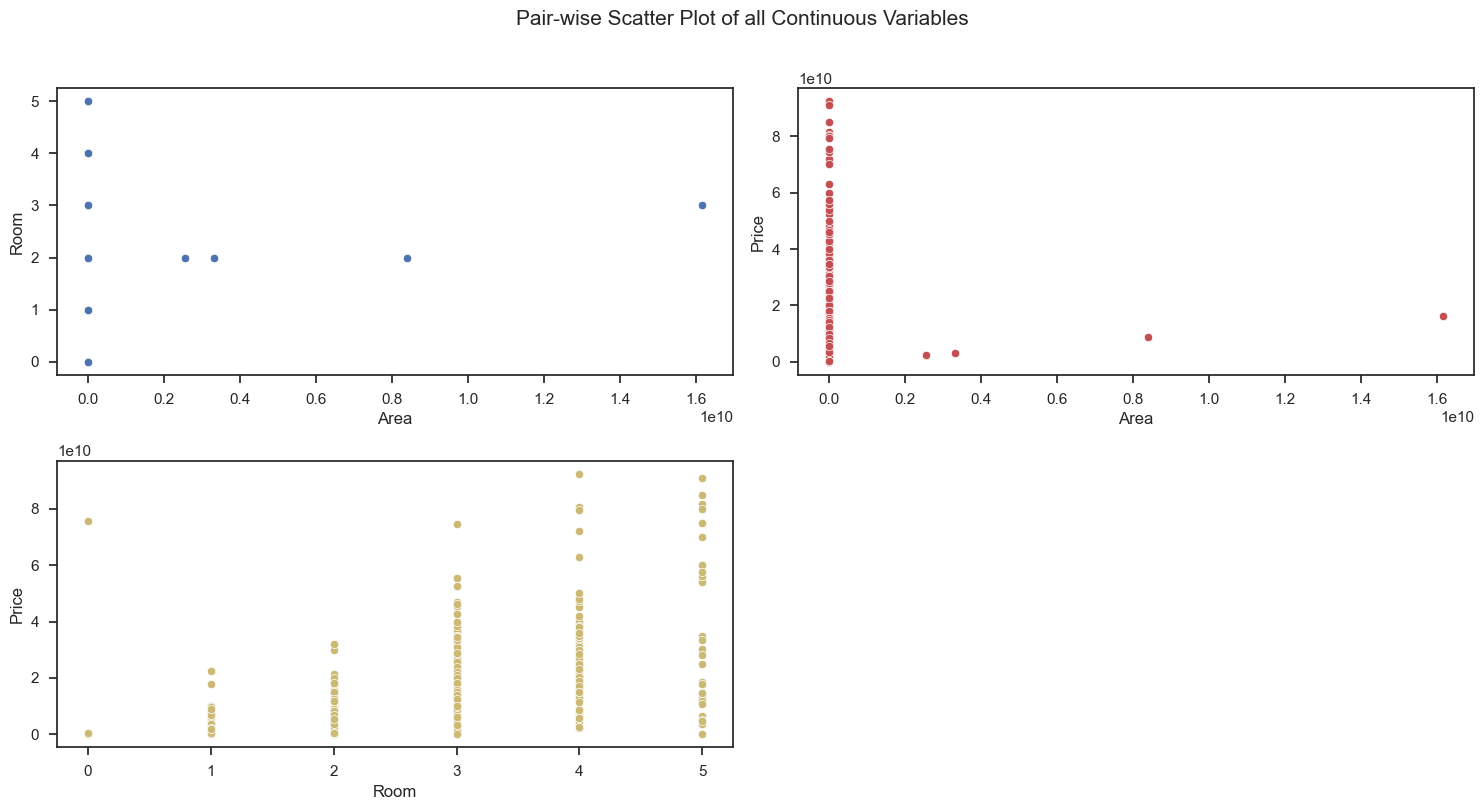

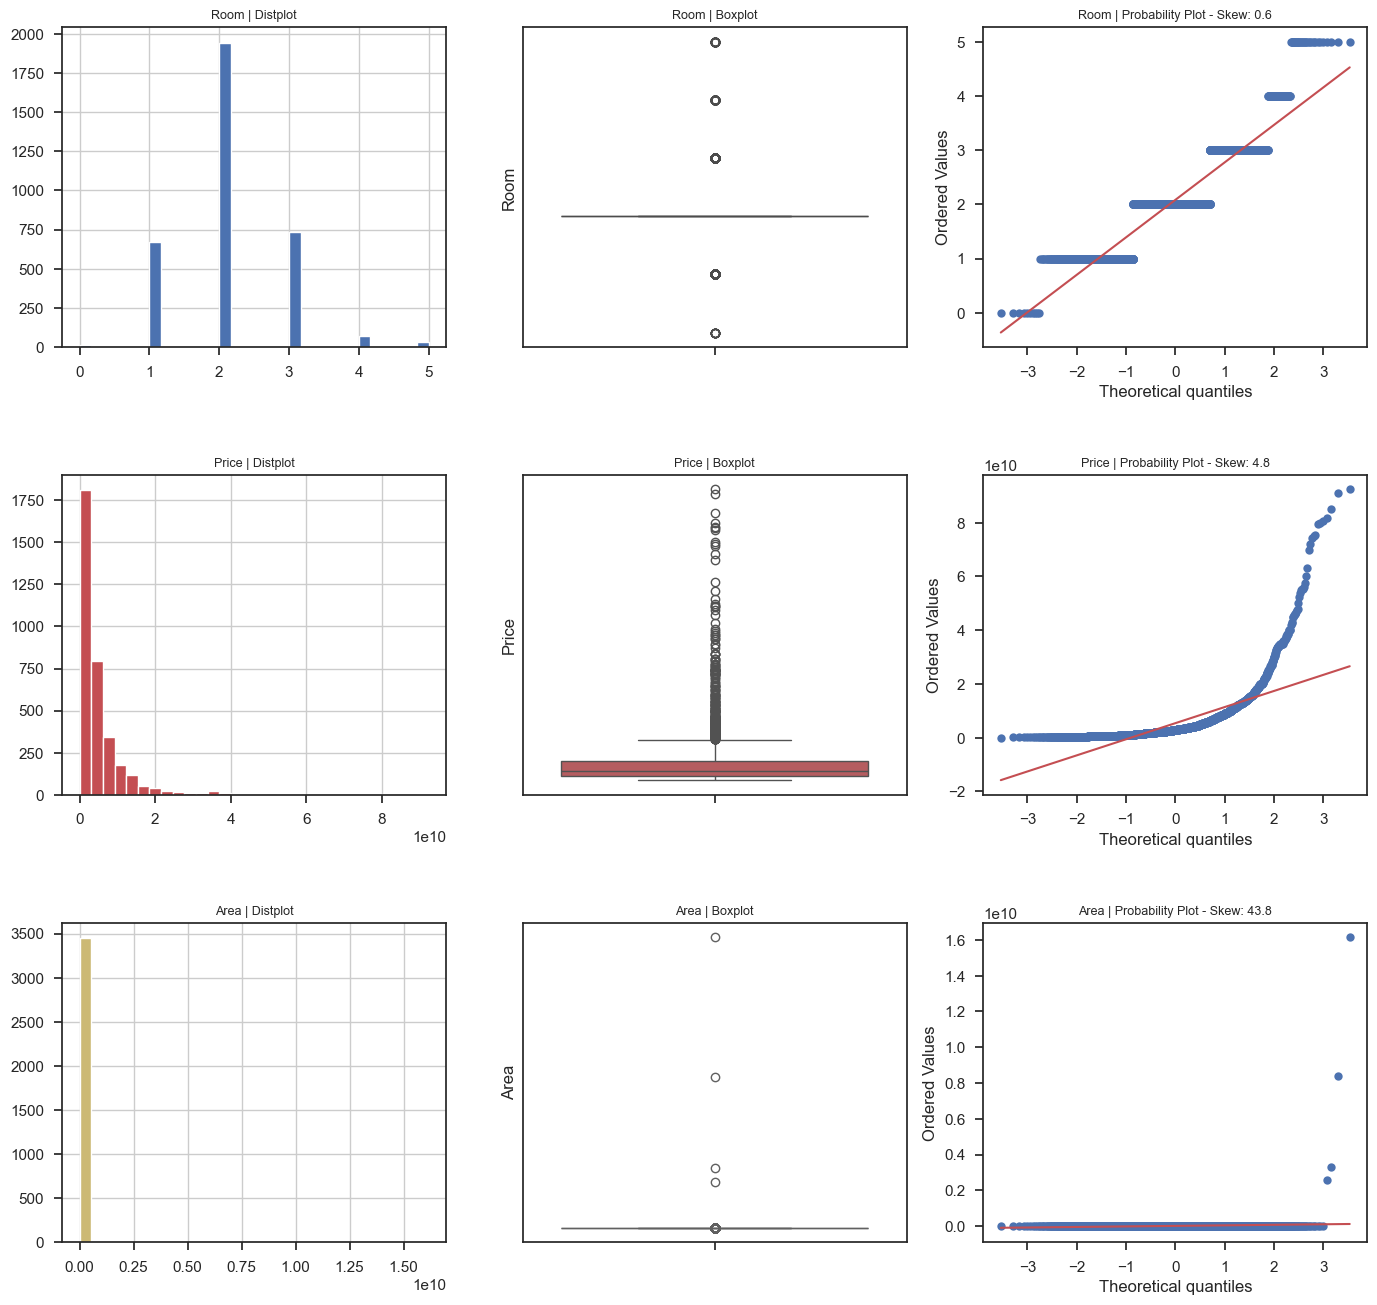

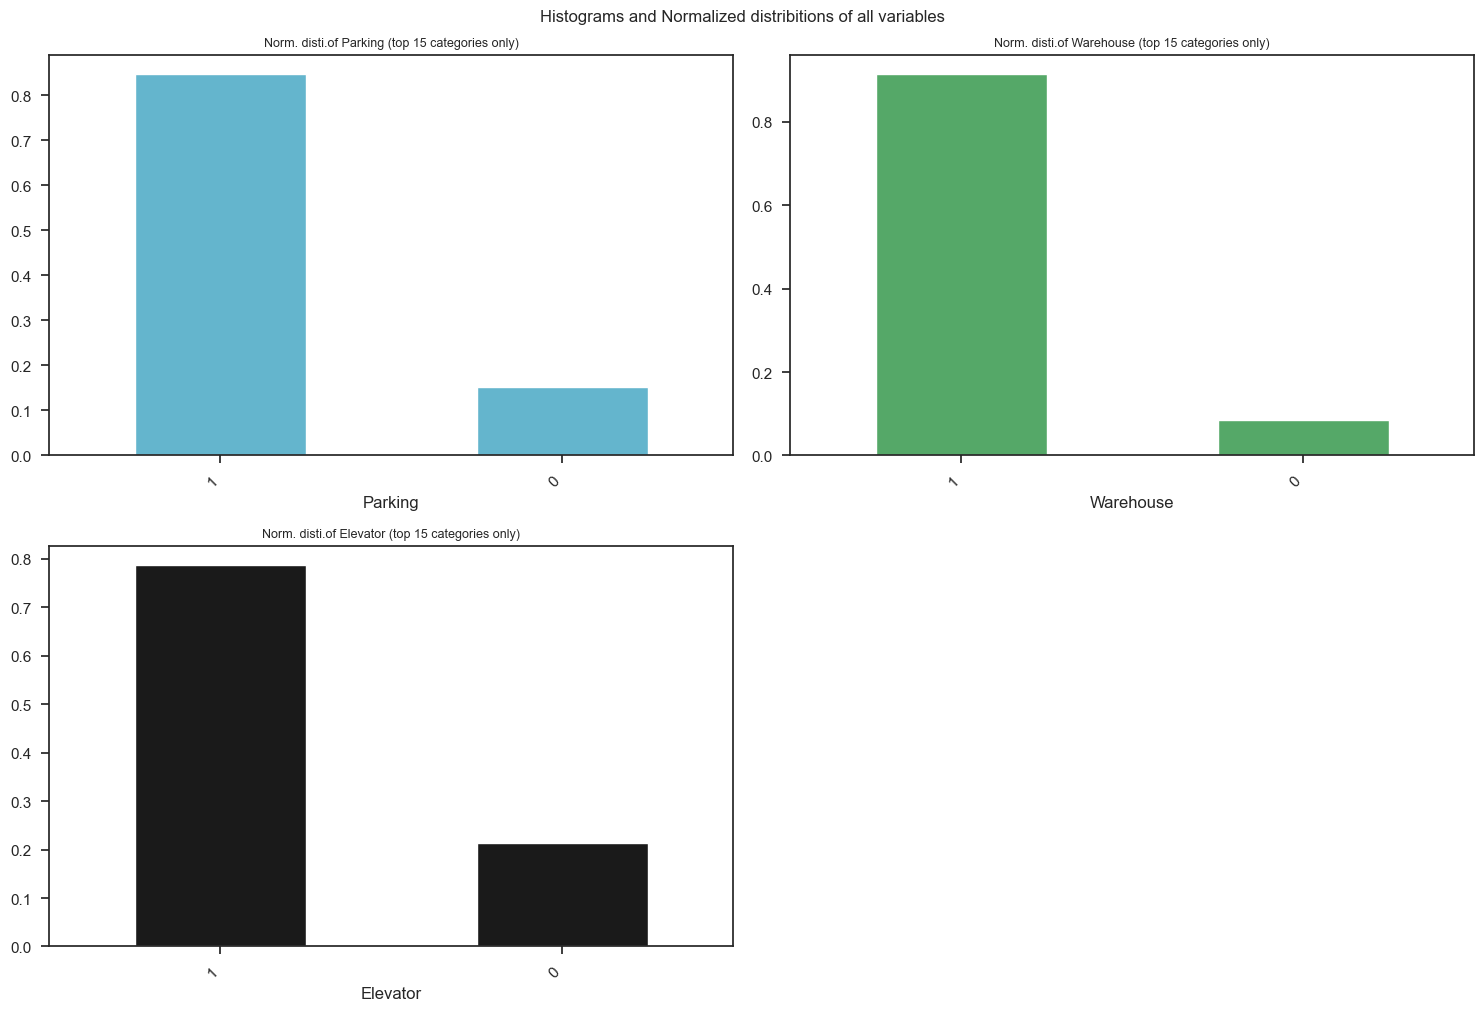

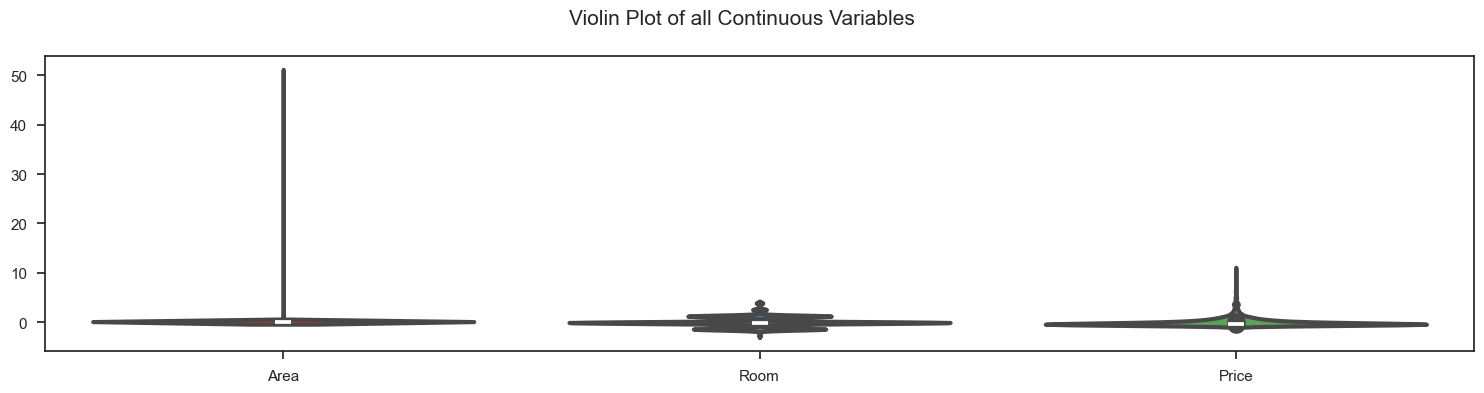

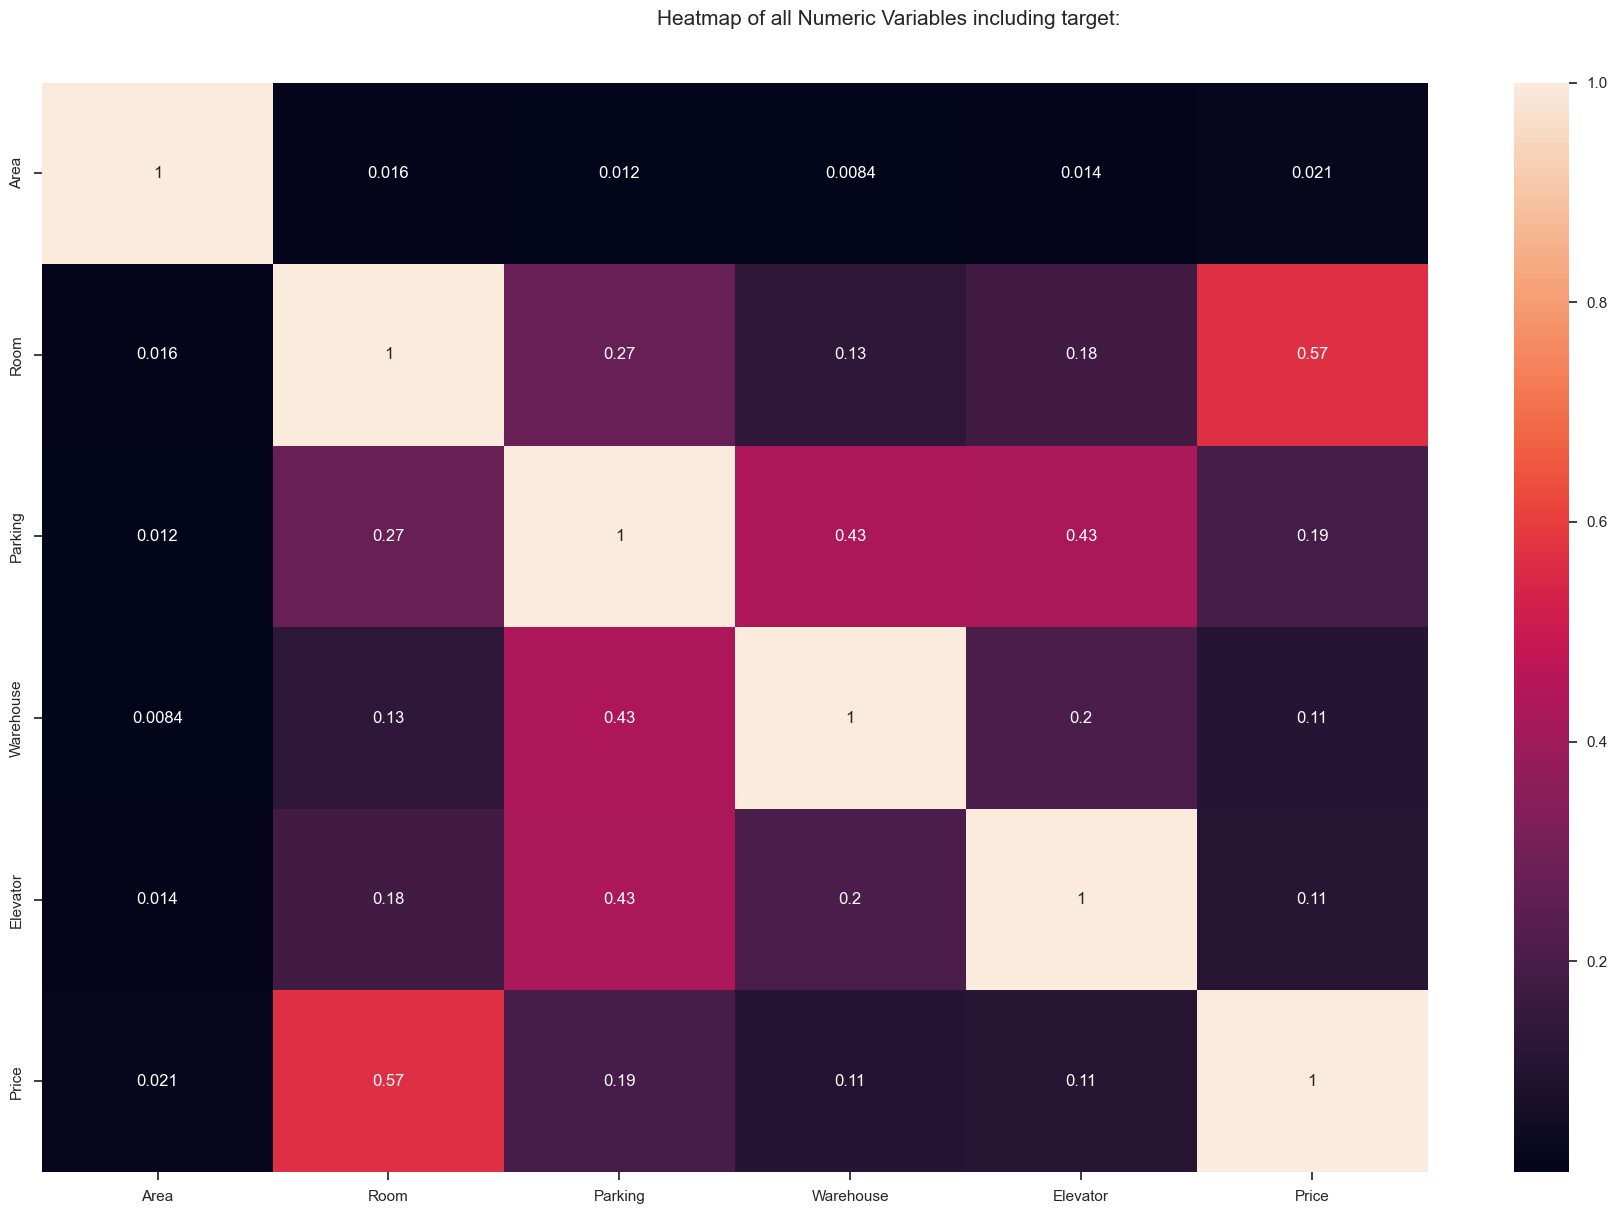

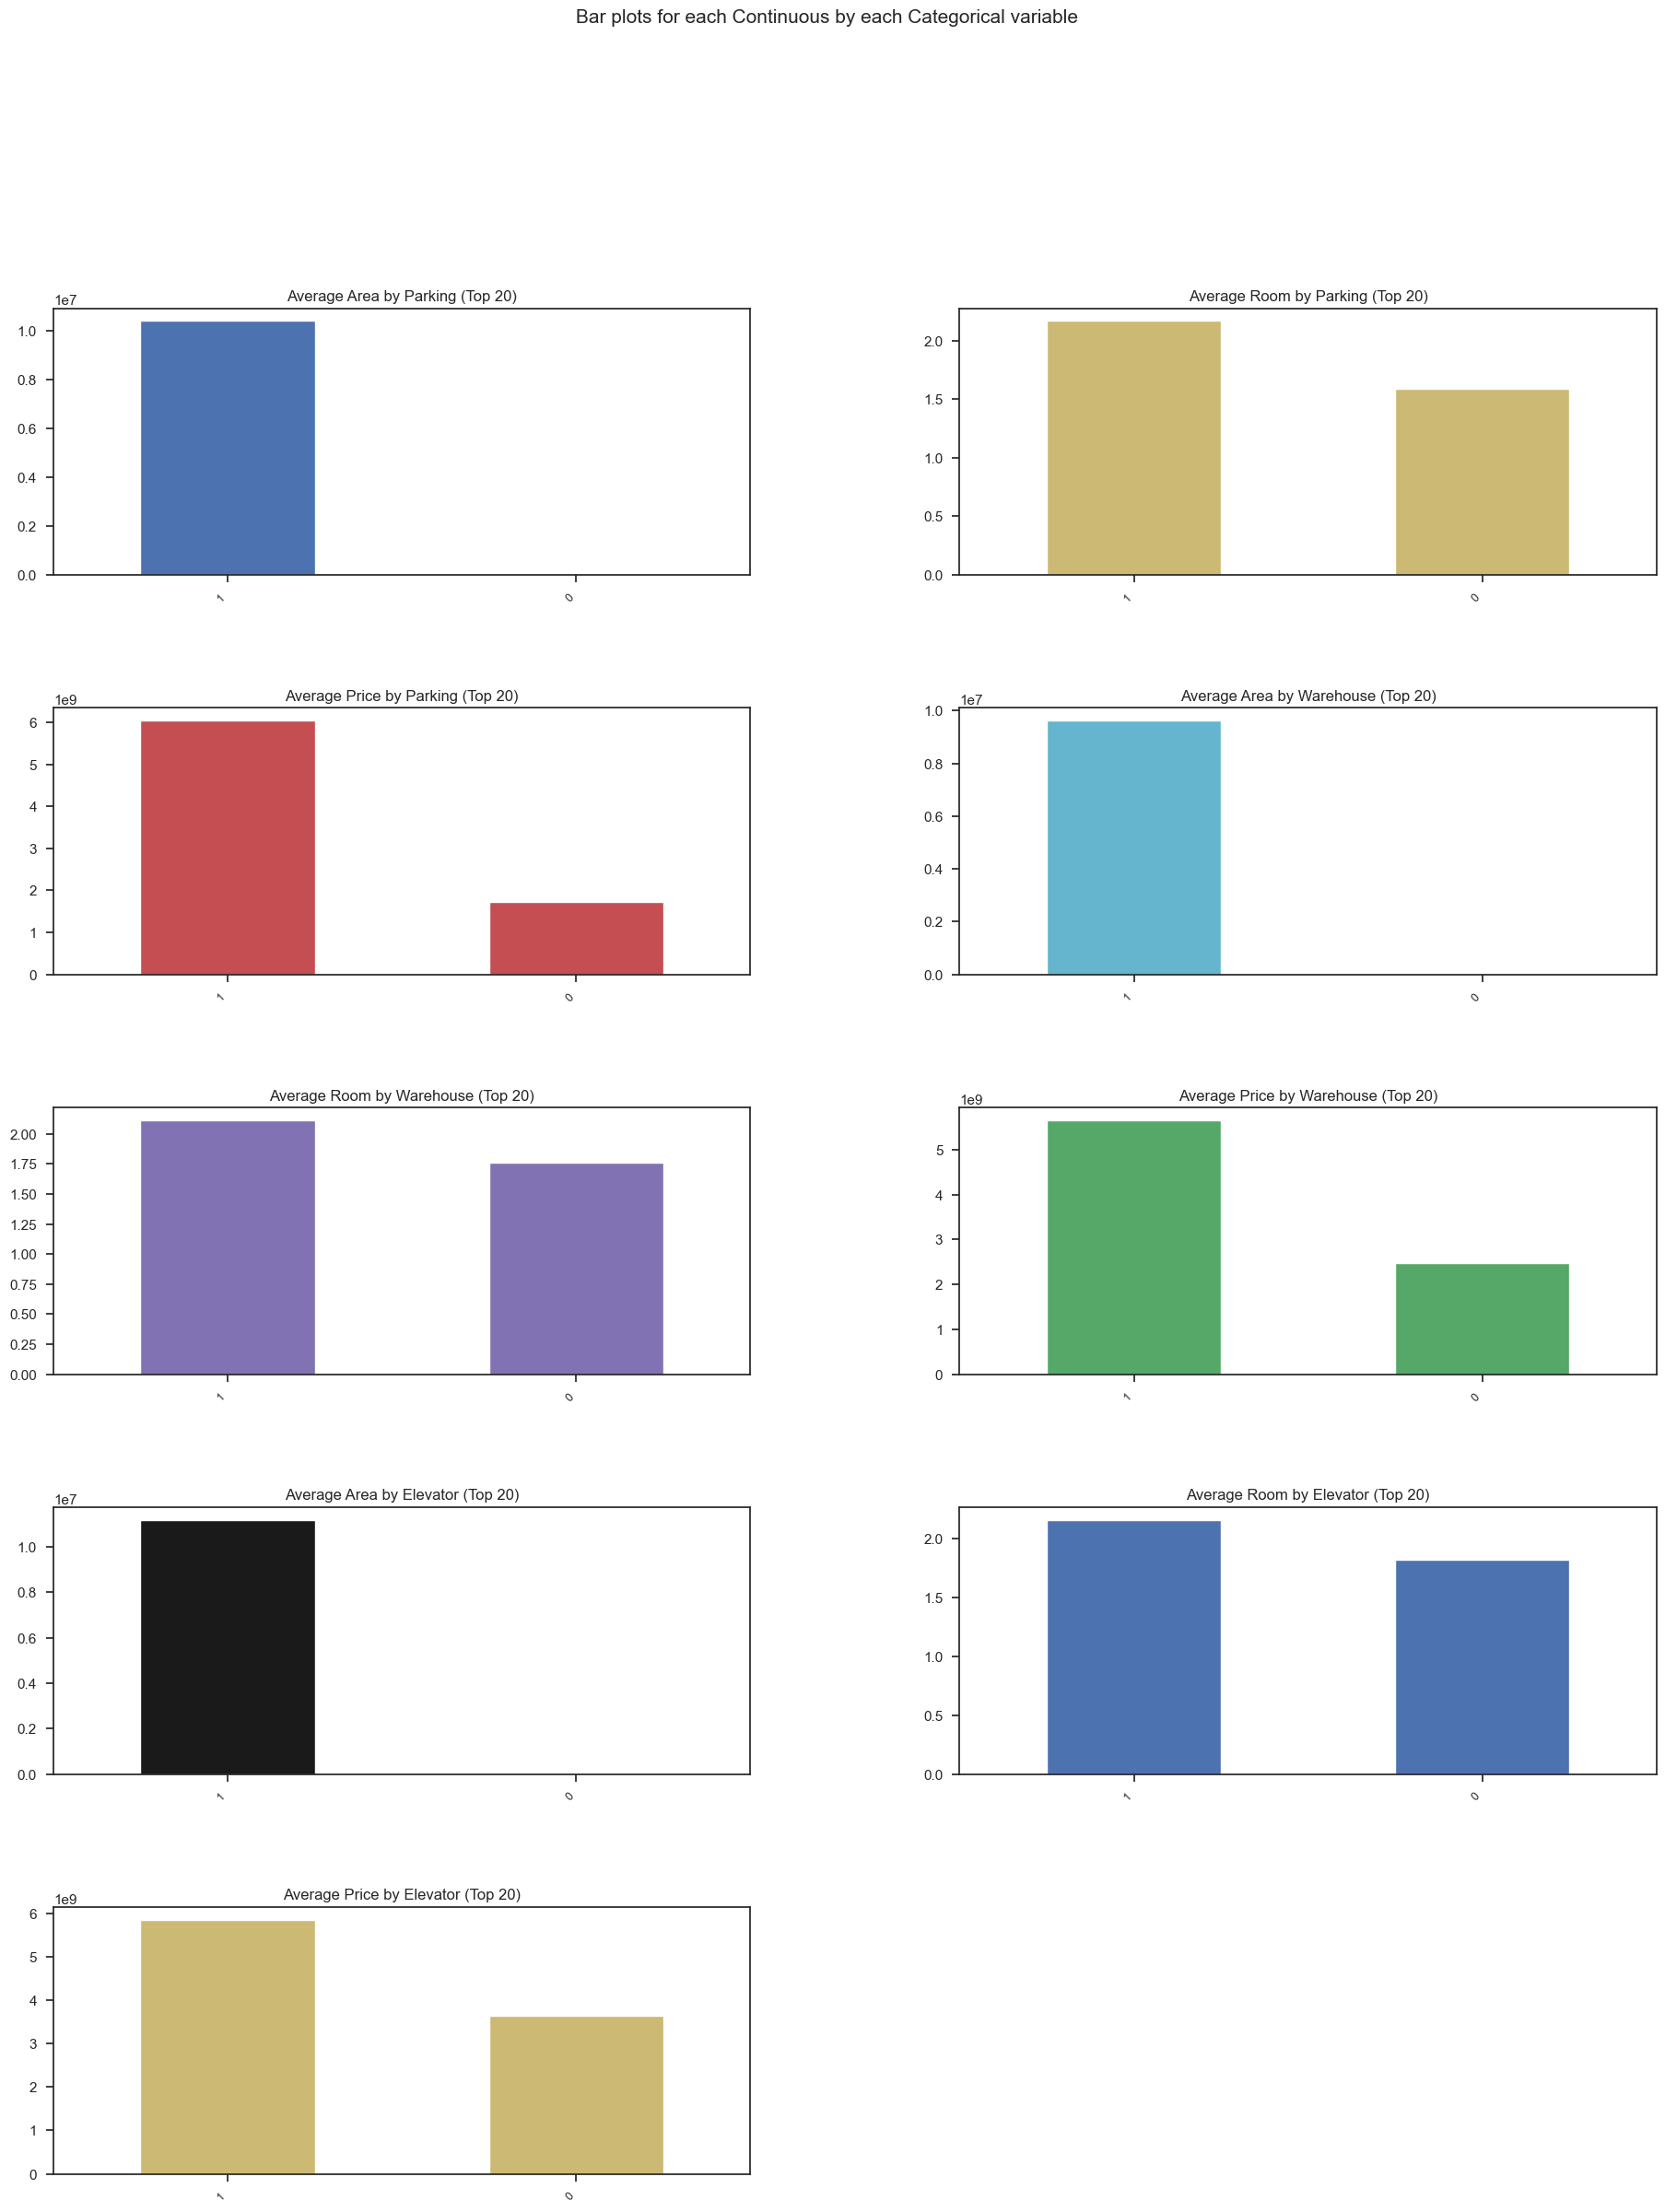

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Sahra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Sahra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Sahra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Sahra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Sahra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

Could not draw wordcloud plot for Address. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


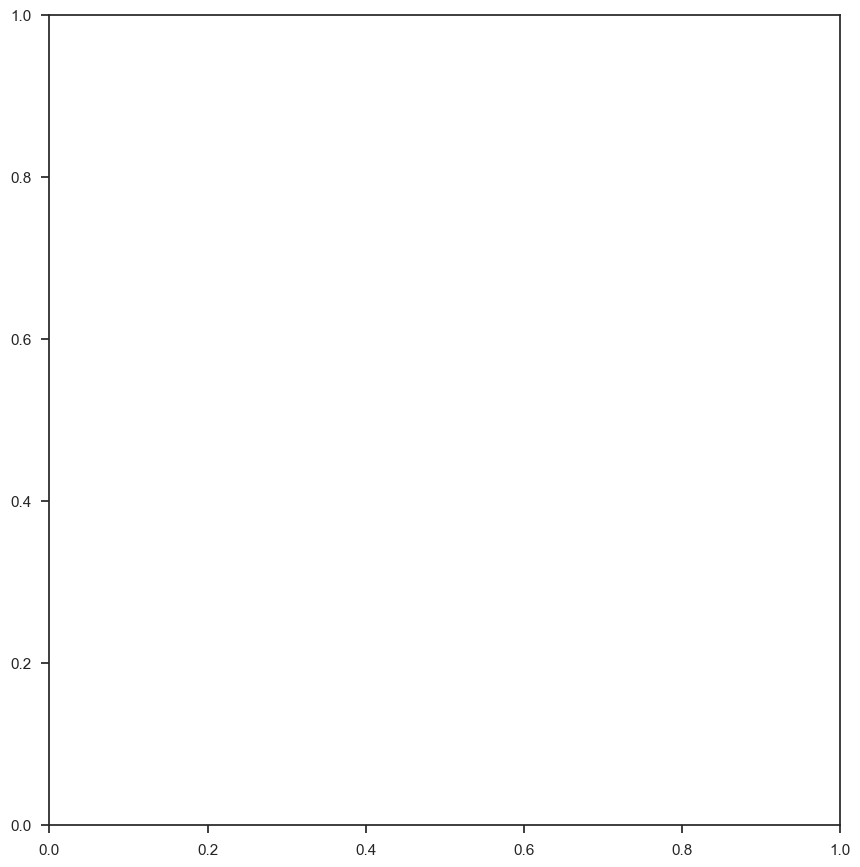

In [78]:
def eda(df):
    AV = AutoViz_Class()
    AV.AutoViz('', dfte=df)

# بعد:
eda(df)


In [79]:
my_model=create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1268670109.4876,22078920628292947968.0000,4698821195.6078,0.5947,0.5557,5.0995
1,1876128900.7603,37577334972532506624.0000,6130035478.8967,0.2678,0.4605,0.4281
2,1507595753.1240,11509749758179571712.0000,3392602210.4248,0.7571,0.5047,0.4502
3,1333961006.6446,11350327595897044992.0000,3369024724.7382,0.7334,0.4124,0.3646
4,1153755971.7810,5784549725490556928.0000,2405109088.0645,0.8328,0.5448,0.7733
5,1497320559.5372,33382908940510146560.0000,5777794470.2551,0.4948,0.3862,0.2726
6,1305519524.0992,10017450458846255104.0000,3165035617.3108,0.8693,0.3208,0.2274
7,1500674824.3967,14808285008340692992.0000,3848153454.3649,0.7518,0.4419,0.3545
8,1566920139.4050,37755421420800237568.0000,6144544036.8509,0.5536,0.4096,0.2902


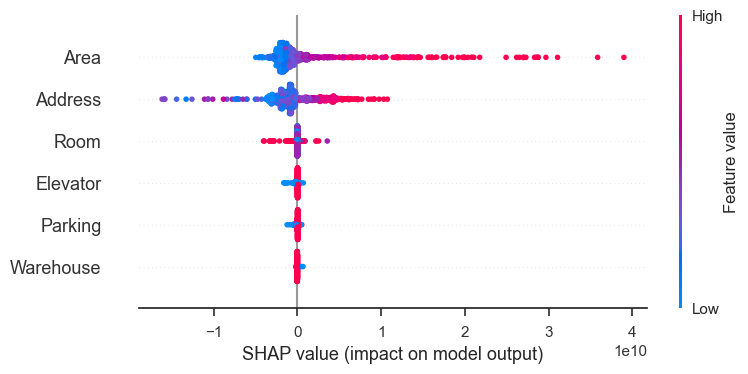

In [80]:
interpret_model(my_model)

In [81]:
df.shape

(3456, 7)

In [82]:
df['Parking'].value_counts(normalize=True)*100

Parking
1   85
0   15
Name: proportion, dtype: float64

In [83]:
pd.crosstab( df.Parking, df.Room )

Room,0,1,2,3,4,5
Parking,,,,,,
0,8,243,244,26,1,5
1,2,426,1699,705,69,28


In [84]:
below_85 = df[ df.Area <= 85 ]
len(below_85)

1522

In [85]:
df[ df.Area <= 85 ]["Parking"].value_counts( )

Parking
1    1104
0     418
Name: count, dtype: int64

In [86]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [87]:
len(df.Address.unique())

192

In [88]:
round(df.Price.mean())

5379956887

In [89]:
df.groupby( 'Room' )['Price'].mean()

Room
0    7860500000
1    1707480867
2    3330303037
3   10938692886
4   25600328571
5   33734393939
Name: Price, dtype: float64

In [90]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [91]:
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,0,9769750000
1,0,1,223500000
2,1,0,1139677778
3,1,1,2031368545
4,2,0,1501674180
5,2,1,3592919541
6,3,0,5107865385
7,3,1,11153730496
8,4,0,6200000000
9,4,1,25881492754


In [92]:
df2 = df.copy()

In [93]:
df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)

In [94]:
df2

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,"1,850,000,000"
1,60,1,1,1,1,Shahran,"1,850,000,000"
2,79,2,1,1,1,Pardis,"550,000,000"
3,95,2,1,1,1,Shahrake Qods,"902,500,000"
4,123,2,1,1,1,Shahrake Gharb,"7,000,000,000"
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,"3,500,000,000"
3475,83,2,1,1,1,Niavaran,"6,800,000,000"
3476,75,2,0,0,0,Parand,"365,000,000"
3477,105,2,1,1,1,Dorous,"5,600,000,000"


# Visualizaion

<Figure size 800x500 with 0 Axes>

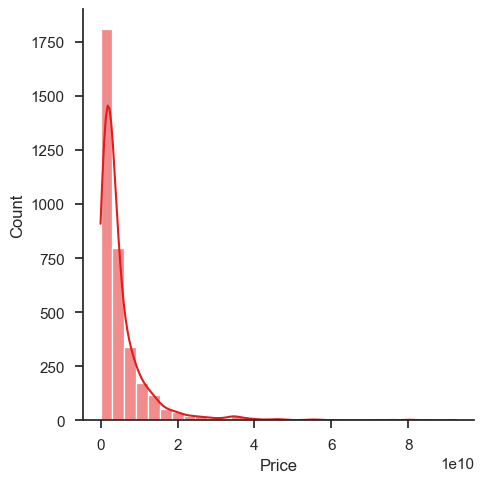

In [95]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'] , bins=30 , kde=True )

<Axes: >

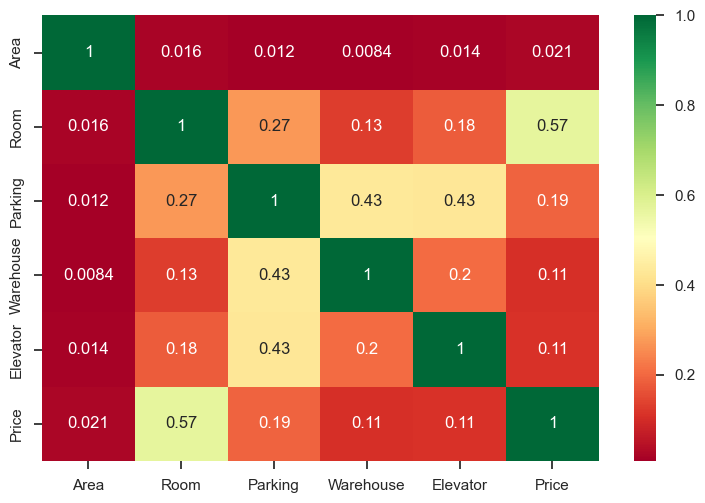

In [96]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='RdYlGn')


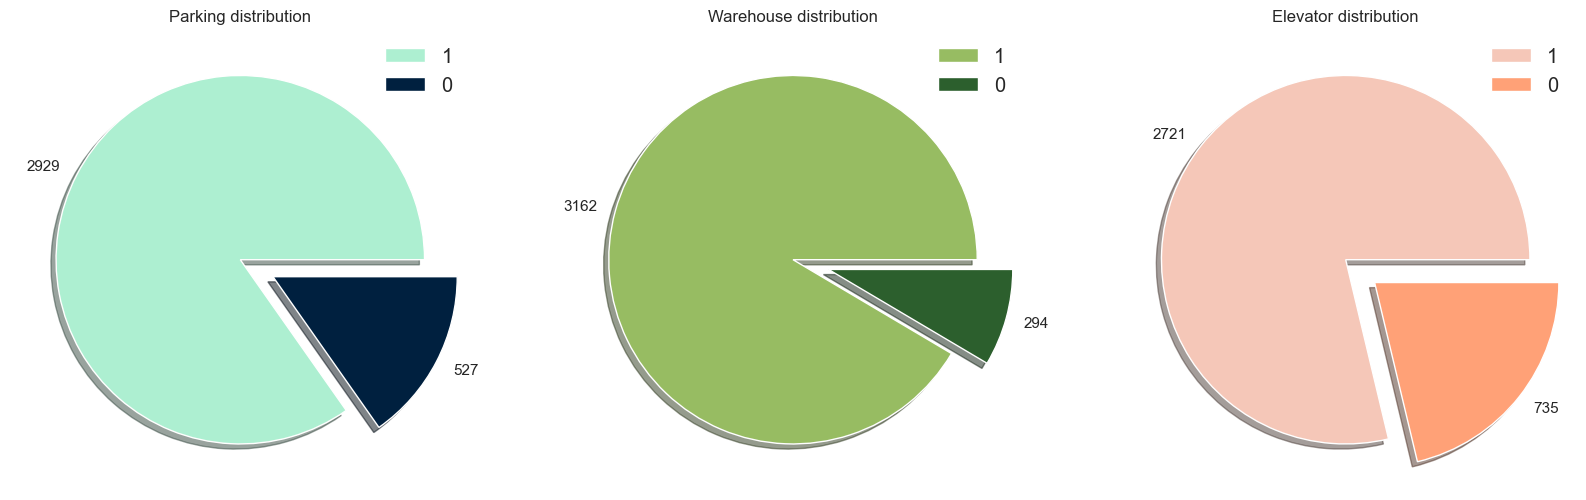

In [97]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

In [98]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]


Text(0.5, 1.0, 'Number of flats in location')

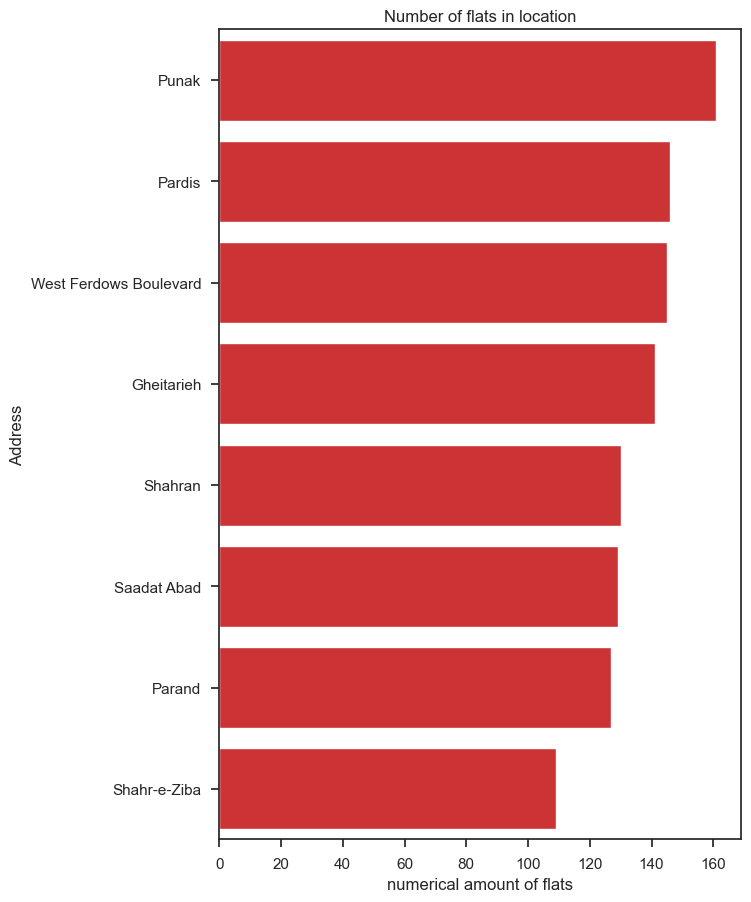

In [99]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index,ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')

In [100]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

In [101]:
df.sort_values('Price',ascending=False)[['Address']].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


# Model Building

In [102]:
address_dummy = pd.get_dummies(df['Address'], dtype=int)
df= df.merge(address_dummy, left_index=True, right_index=True)
df.drop(columns='Address', inplace=True)
df.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Price'>

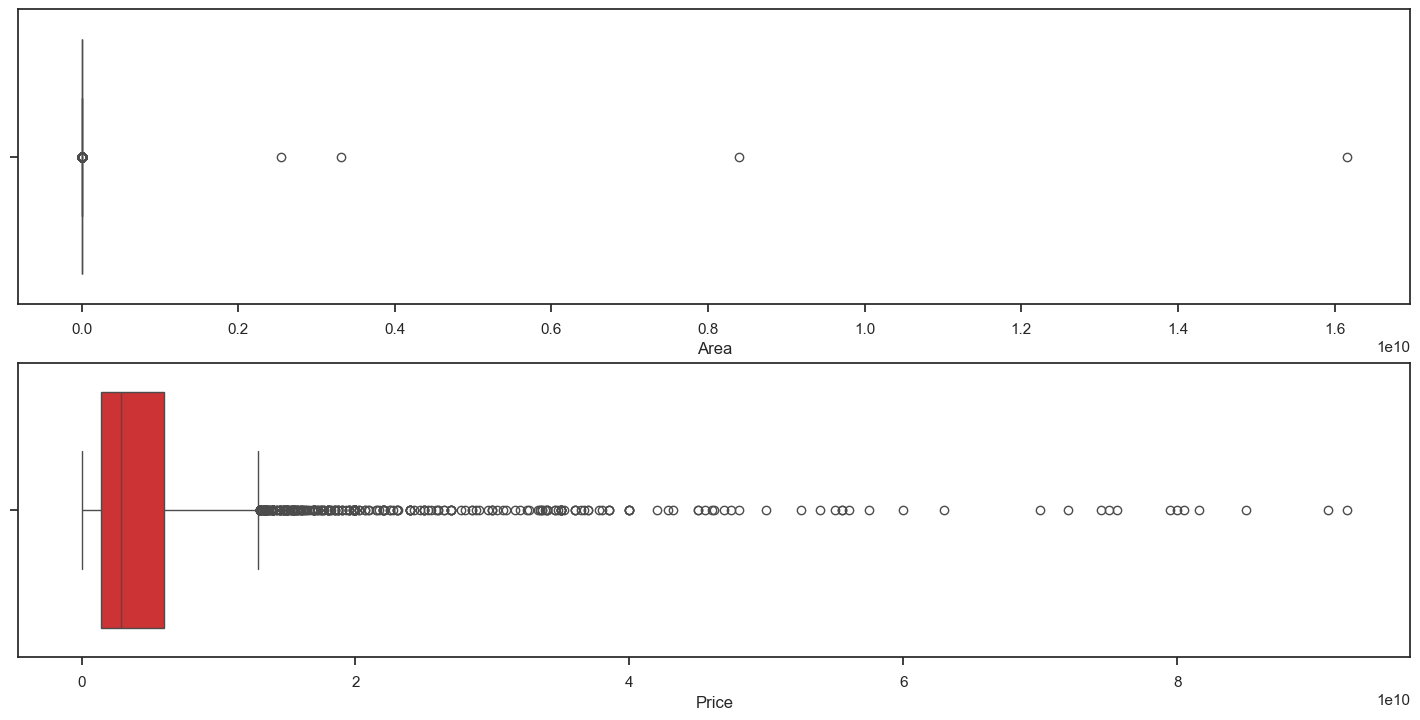

In [103]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])

In [104]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [105]:
area_outliers = np.where((df['Area'] > upper_area) | (df['Area']< lower_area))
price_outliers = np.where((df['Price'] > upper_price) | (df['Price']< lower_price))
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 237
Number of price outliers: 310
Number of outliers: 366


In [106]:
total_outliers

array([  25,   58,   83,  101,  145,  159,  160,  166,  173,  176,  187,
        189,  193,  195,  196,  200,  210,  215,  218,  220,  226,  234,
        235,  238,  260,  262,  264,  269,  270,  281,  283,  284,  297,
        299,  315,  327,  329,  338,  339,  340,  342,  343,  344,  345,
        346,  347,  348,  349,  351,  353,  355,  356,  362,  363,  364,
        394,  410,  411,  412,  429,  430,  436,  439,  458,  463,  496,
        512,  514,  515,  516,  525,  534,  547,  553,  559,  564,  565,
        566,  567,  569,  572,  576,  577,  578,  579,  582,  599,  600,
        610,  627,  635,  638,  640,  641,  648,  649,  652,  706,  712,
        721,  729,  730,  731,  738,  739,  740,  753,  765,  792,  803,
        804,  816,  819,  828,  834,  836,  849,  872,  876,  891,  955,
        956,  962, 1005, 1006, 1012, 1021, 1022, 1028, 1031, 1033, 1103,
       1110, 1114, 1128, 1136, 1137, 1148, 1174, 1175, 1228, 1230, 1231,
       1232, 1258, 1260, 1265, 1266, 1270, 1282, 12

In [107]:
df

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,902500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3500000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83,2,1,1,1,6800000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,75,2,0,0,0,365000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,105,2,1,1,1,5600000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
X = df.drop(columns = 'Price')
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2764, 197)
shape of y train: (2764,)
shape of x test: (692, 197)
shape of y train: (692,)


In [109]:
# راه‌اندازی WandB
wandb.init(
    project="wandb-project",
    entity="zahra-parhizkar99-zanjan-university-of-medical-sciences",
    config={
        "model_type": "XGBRegressor",
        "n_estimators": [100,200,250],
        "learning_rate": [0.1,0.05],
        "subsample": [0.8,0.9],
        "colsample_bytree": [1],
        "max_depth": [7,8,9],
        "gamma": [0]
    }
)

def parameter_finder(model, parameters):
    start = time.time()
    
    grid = GridSearchCV(
        model, 
        param_grid = parameters, 
        refit = True, 
        cv = KFold(shuffle = True, random_state = 1), 
        n_jobs = -1
    )
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score = grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = str(model).split('(')[0]
    
    # لاگ کردن نتایج در WandB
    wandb.log({
        "train_R2": train_score,
        "test_R2": test_score,
        "RMSE": RMSE,
        "best_params": grid_fit.best_params_
    })
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    
    return grid_fit.best_estimator_, train_score, test_score, RMSE  

# اجرای مدل و لاگ کردن در WandB
xgboost = XGBRegressor(n_jobs=-1)
param_xgboost = {
    'n_estimators': [100,200,250],
    'learning_rate': [0.1,0.05],
    'subsample': [0.8,0.9],
    'colsample_bytree': [1],
    'max_depth': [7,8,9],
    'gamma': [0]
}

best_model, train_score, test_score, RMSE = parameter_finder(xgboost, param_xgboost)

# پایان wandb
wandb.finish()


The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}
--------------------
(R2 score) in the training set is 96.97% for XGBRegressor model.
(R2 score) in the testing set is 80.63% for XGBRegressor model.
RMSE is 4,097,436,629.1593537 for XGBRegressor model.
--------------------
Runtime of the program is: 455.42


RMSE,▁
test_R2,▁
train_R2,▁
RMSE,4097436629.15935
test_R2,0.80627
train_R2,0.96966


Streamlit

In [115]:
xgboost_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=1,
    max_depth=8,
    gamma=0,
    n_jobs=-1
)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

# Save your Model

In [116]:
# ذخیره مدل
joblib.dump(xgboost_model, 'finalized_model.sav')


['finalized_model.sav']

In [111]:
# بارگذاری مدل
#loaded_model = joblib.load('finalized_model.sav')
#result = loaded_model.score(X_test, y_test)
#print(result)